Описание признаков
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/heart.csv', sep=',')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = data.loc[:, data.columns != 'target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
Y = data['target']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size = 0.2, random_state = 1)
X_train.shape, y_train.shape

((242, 13), (242,))

In [12]:
X_test.shape, y_test.shape

((61, 13), (61,))

In [17]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
predicted = knc.predict(X_test)
predicted

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

Метрики: f1, recall, accuracy

In [18]:
classification_report(y_test, predicted, output_dict=True)["0"], \
classification_report(y_test, predicted, output_dict=True)["1"]

({'precision': 0.5833333333333334,
  'recall': 0.4666666666666667,
  'f1-score': 0.5185185185185186,
  'support': 30},
 {'precision': 0.5675675675675675,
  'recall': 0.6774193548387096,
  'f1-score': 0.6176470588235294,
  'support': 31})

In [19]:
# при помощи решетчатого поиска и кросс-валидации найдем оптимальное значение гиперпараметра k
scoring = {
    'recall': make_scorer(recall_score), 
    'f1': make_scorer(f1_score), 
    'accuracy': make_scorer(accuracy_score)
}
n_range = np.array(range(1,60,3))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
         52, 55, 58])}]

In [20]:
knc_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring=scoring, refit='f1')
knc_gs.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58])}],
       pre_dispatch='2*n_jobs', refit='f1', return_train_score='warn',
       scoring={'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score), 'accuracy': make_scorer(accuracy_score)},
       verbose=0)

In [21]:
knc_gs.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\u

{'mean_fit_time': array([0.00199656, 0.00179501, 0.00179691, 0.00179634, 0.00159898,
        0.00139937, 0.0015964 , 0.00180006, 0.00159907, 0.00159917,
        0.00179887, 0.00139904, 0.0018012 , 0.00160127, 0.00159903,
        0.00199928, 0.00199866, 0.00199814, 0.00159569, 0.00160103]),
 'std_fit_time': array([3.03607128e-06, 3.98488662e-04, 4.04095857e-04, 3.98354557e-04,
        4.89706900e-04, 4.89901475e-04, 4.86646800e-04, 3.98756966e-04,
        4.89687246e-04, 4.89473113e-04, 4.00185596e-04, 4.89493097e-04,
        4.00783586e-04, 4.87207451e-04, 4.89745687e-04, 4.15696997e-07,
        4.26496120e-07, 6.14805659e-06, 4.87151655e-04, 4.91213641e-04]),
 'mean_score_time': array([0.00759645, 0.00799556, 0.00779281, 0.00739841, 0.00759449,
        0.00759549, 0.00739813, 0.00759106, 0.00779419, 0.00785155,
        0.00759583, 0.00759435, 0.00799742, 0.00799522, 0.00798254,
        0.00959482, 0.0083952 , 0.00839653, 0.00799799, 0.00828195]),
 'std_score_time': array([8.02484643e-

In [22]:
# Лучшая модель
best_knc = knc_gs.best_estimator_
best_knc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=31, p=2,
           weights='uniform')

In [23]:
# Лучшее f1
knc_gs.best_score_

0.7032157012880798

In [28]:
# Лучшее k
knc_gs.best_params_

{'n_neighbors': 31}

In [29]:
# Проверяем на новом k
best_knc.fit(X_train, y_train)
predicted_best = knc.predict(X_test)
predicted_best

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [30]:
classification_report(y_test, predicted_best, output_dict=True)["0"], \
classification_report(y_test, predicted_best, output_dict=True)["1"]

({'precision': 0.5833333333333334,
  'recall': 0.4666666666666667,
  'f1-score': 0.5185185185185186,
  'support': 30},
 {'precision': 0.5675675675675675,
  'recall': 0.6774193548387096,
  'f1-score': 0.6176470588235294,
  'support': 31})

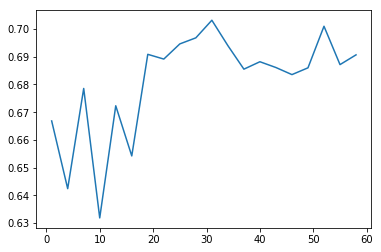

In [32]:
# изменение f1 от k
plt.plot(n_range, knc_gs.cv_results_['mean_test_f1'])

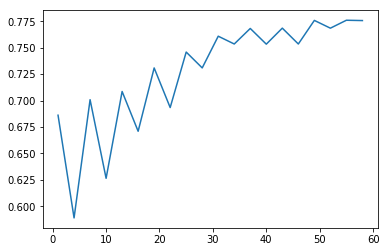

In [33]:
# изменение recall от k
plt.plot(n_range, knc_gs.cv_results_['mean_test_recall'])

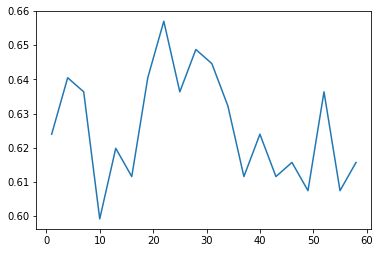

In [34]:
# изменение accuracy от k
plt.plot(n_range, knc_gs.cv_results_['mean_test_accuracy'])

In [35]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

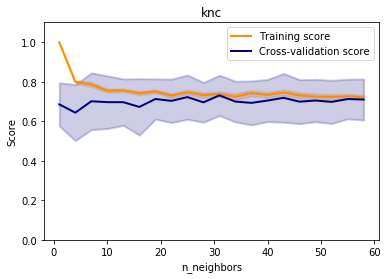

In [36]:
plot_validation_curve(KNeighborsClassifier(), 'knc', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="f1")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

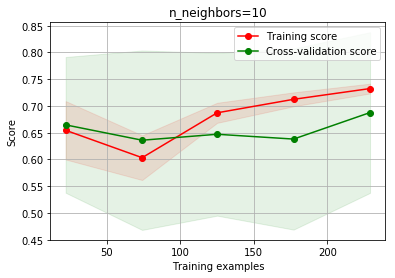

In [37]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), 'n_neighbors=10', 
                    X_train, y_train, cv=20)